---

<div align="center">

# 🐾 **Felis Taxonomy Classification | DenseNet121** 🐾  
### *Course Project - Deep Learning*

</div>

---

#### **`Part II | Fine Tuning`**

| **Author**        | Shagun                                          |
|--------------------|------------------------------------------------|
| **School**        | School of Computing & Data Science, Sai University |
| **Email ID**      | shagun.s-26@scds.saiuniversity.edu.in          |
| **Date Created**  | 26/12/2024                                     |

---

### **🔍 Project Overview**

- **Problem**: `Image Classification`
- **Dataset**: `Felis Taxonomy`
- **Model**: `DenseNet121`
- **Key Library Used**: `TensorFlow Keras`

---

### **📄 Description**

This section focuses on **Fine Tuning** to further improve the classification of **Felis (cat) images** into **7 types**, leveraging the pre-trained **DenseNet121 model**. Fine-tuning involves unfreezing certain layers of the feature extractor to allow specialized learning for the given dataset.

---

<div align="center">

✨ Happy Coding! ✨

</div>


## Downloading and preparing the data

In [1]:
# Import required libraries

import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

2.17.1


In [2]:
import os
import glob
import PIL
from PIL import Image

In [3]:
from google.colab import drive
import glob

# Mount Google Drive
drive.mount('/content/drive')

# from drive
imgFiles = glob.glob("/content/drive/MyDrive/Felis_Taxonomy/*/*.jpg")


Mounted at /content/drive


In [4]:
print(len(imgFiles))

519


In [5]:
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (10).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (1).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (18).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (26).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (24).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (20).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (2).jpg
/content/drive/MyDrive/Felis_Taxonomy/sand-cat/sd (27).jpg


In [6]:
# Since the model and datasets are already prepared, load them directly from Drive
# load numpy array from npy file
from numpy import load
X_train_std = load('/content/drive/MyDrive/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/Models/y_test.npy')
print(f"No. of training samples: {X_train_std.shape[0]}")
print(f"No. of testing samples: {X_test_std.shape[0]}")

No. of training samples: 389
No. of testing samples: 130


In [7]:
import os
print(os.listdir('/content/drive/MyDrive/Models'))


['DenseNet121_FineLearning_BestModel.keras', 'EfficientNetV2_TransferLearning_BestModel.keras', 'EfficientNetV2_FineTuning_BestModel.keras', 'InceptionV3_TransferLearning_BestModel.keras', 'InceptionV3_FineTuning_BestModel.keras', 'DenseNet121_TransferLearning_BestModel.keras', 'X_train_std.npy', 'y_test.npy', 'y_train.npy', 'X_test_std.npy']


In [8]:
import os
file_path = '/content/drive/MyDrive/Models/DenseNet121_TransferLearning_BestModel.keras'
if os.path.exists(file_path):
    print("File exists")
else:
    print("File not found")


File exists


In [9]:
# Load the model saved in the native Keras format
model2_FT = keras.models.load_model(file_path)
model2_FT.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_4          │ (None, None, None, 3)  │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,408 │ zero_padding2d_4[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_5          │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, None, None, 64) │              0 │ zero_padding2d_5[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, None, None, 64) │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, None, None, 64) │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None,     │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None,     │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None,     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 32) │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, None, None, 96) │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,067,223 (26.96 MB)

 Trainable params: 9,223 (36.03 KB)

 Non-trainable params: 7,039,552 (26.85 MB)

 Optimizer params: 18,448 (72.07 KB)

## Fine Tuning the model
In this Fine Tuning experiment, we freeze the initial 35% of the Feature Extractor's layers so that they are not updated during backpropagation

In [10]:
# NOTE: Last 4 layers of the model belong to classifier
train_threshold = int(0.35*(len(model2_FT.layers)-4))

for layer in model2_FT.layers[:train_threshold]:
    layer.trainable = False

for layer in model2_FT.layers[train_threshold:]:
    layer.trainable = True

## Compiling and training the model

In [11]:
model2_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FT = [
             keras.callbacks.ModelCheckpoint("bestTL.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_FT = model2_FT.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_FT)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 208s 5s/step - accuracy: 0.6281 - loss: 1.1607 - val_accuracy: 0.3077 - val_loss: 5.5509
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.7782 - loss: 0.6381 - val_accuracy: 0.3846 - val_loss: 4.0065
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9342 - loss: 0.2025 - val_accuracy: 0.6667 - val_loss: 2.5630
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9936 - loss: 0.0322 - val_accuracy: 0.6667 - val_loss: 2.2295
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9972 - loss: 0.0157 - val_accuracy: 0.7179 - val_loss: 1.9963
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.6923 - val_loss: 1.8394
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.7179 - val_loss: 1.6105
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9987 - loss: 0.0059 - val_accuracy: 0.6923 

## Visualising the model's training accuracy

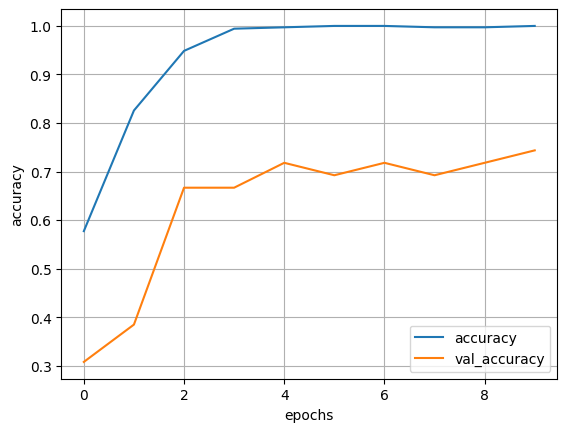

In [12]:
progress = {k:v for k,v in history_FT.history.items() if k in ['accuracy', 'val_accuracy']}

pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

## Evaluating the model

In [13]:
# Loading the model's best weights during training
model2_FT.load_weights("bestTL.weights.h5")

# Test loss and test accuracy
testLoss_FT, testAccuracy_FT = model2_FT.evaluate(x = X_test_std, y = y_test, batch_size=16)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8253 - loss: 0.6328
Test-loss: 0.665489, Test-accuracy: 0.823077


In [14]:
# Making predictions on the test set

y_proba = model2_FT.predict(X_test_std)
y_pred = np.argmax(y_proba, axis=-1)
print(y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
[2 3 4 4 0 1 1 5 3 1 4 0 6 1 3 0 6 0 5 4 4 3 1 6 4 1 6 5 0 4 1 1 6 2 4 1 4
 4 4 3 3 1 1 4 5 0 4 4 3 5 3 3 4 4 5 4 0 4 5 0 4 0 3 2 5 6 5 0 1 1 1 5 0 2
 0 0 0 3 4 6 0 0 2 3 1 5 5 6 5 3 6 2 5 0 6 6 5 4 3 0 5 5 1 6 1 1 4 0 3 1 5
 6 6 0 0 5 0 5 6 2 6 6 3 2 1 6 5 4 5 3]


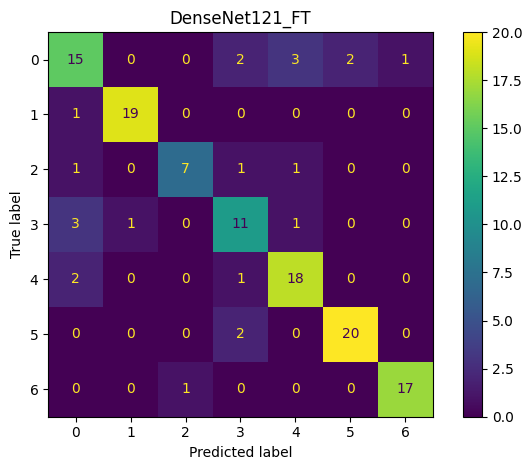

In [15]:
# Confusion Matrix of the model's predictions on the test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
cm.plot()
plt.title("DenseNet121_FT")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfMat_DenseNet121_FT.png", dpi=300, format='png', pad_inches=0.3)
plt.show()



In [16]:
# Classification report

from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.95      0.95      0.95        20
           2       0.88      0.70      0.78        10
           3       0.65      0.69      0.67        16
           4       0.78      0.86      0.82        21
           5       0.91      0.91      0.91        22
           6       0.94      0.94      0.94        18

    accuracy                           0.82       130
   macro avg       0.83      0.81      0.82       130
weighted avg       0.82      0.82      0.82       130



In [17]:
# Save the model in the native Keras format
model2_FT.save('/content/drive/MyDrive/Models/DenseNet121_FineLearning_BestModel.keras')
